In [1]:
from explore_import import  *

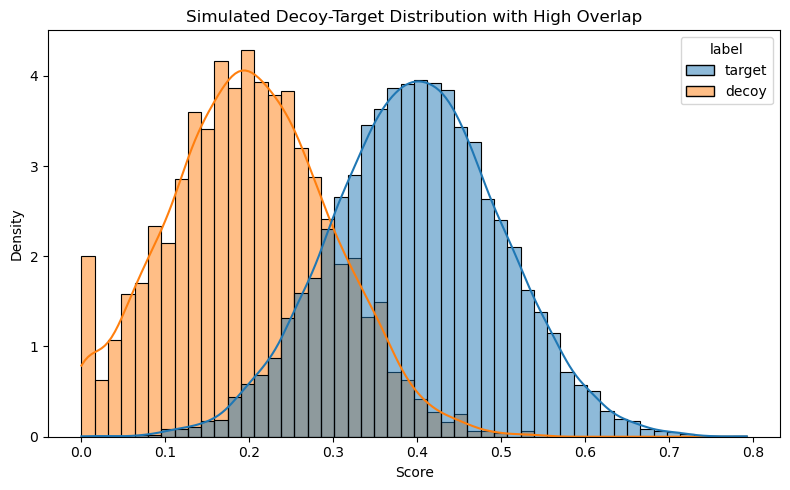

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reproducibility
np.random.seed(42)

# Parameters
n_targets = 10000
n_decoys = 3000

# More overlapping distributions:
# - Mean scores are closer
# - Standard deviations are higher
target_scores = np.random.normal(loc=0.4, scale=0.1, size=n_targets)
decoy_scores = np.random.normal(loc=0.2, scale=0.1, size=n_decoys)

# Clip to [0, 1] range
target_scores = np.clip(target_scores, 0, 1)
decoy_scores = np.clip(decoy_scores, 0, 1)

# Combine into a DataFrame
df = pd.DataFrame({
    "score": np.concatenate([target_scores, decoy_scores]),
    "label": ["target"] * n_targets + ["decoy"] * n_decoys
})

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="score", hue="label", bins=50, kde=True, stat="density", common_norm=False)
plt.title("Simulated Decoy-Target Distribution with High Overlap")
plt.xlabel("Score")
plt.ylabel("Density")
plt.tight_layout()
plt.show()



In [ ]:
#import

#TPP
TPPdict=pickle.load(open("peptideprophet_combined_datasets.pkl","rb"))
#FragPipe
FPdict=pickle.load(open("prophet_combined_datasets.pkl","rb"))

In [3]:
#ionbot closed
IOCLdict=pickle.load(open("closed_combined_first_datasets.pickle","rb"))
#ionbot open
IOOPdict=pickle.load(open("combined_first_datasets.pickle","rb"))

In [210]:
#concatinate in data frames

def concat_runs(data, dataset_name, database):
    data["dataset_name"]=dataset_name
    data["searchDB"]=database
    return data

#TPP
TPPdf=pd.concat([concat_runs(data, dataset_name, database) for dataset_name,subdict in TPPdict.items() for database, data in subdict.items()])
#FragPipe
FPdf=pd.concat([concat_runs(data, dataset_name, database) for dataset_name,subdict in FPdict.items() for database, data in subdict.items()])
#ionbot closed
IOCLdf=pd.concat([concat_runs(data, dataset_name, database) for dataset_name,subdict in IOCLdict.items() for database, data in subdict.items()])
#ionbot open
IOOPdf=pd.concat([concat_runs(data, dataset_name, database) for dataset_name,subdict in IOOPdict.items() for database, data in subdict.items()])

In [211]:
def parse_search_hit(row,feature):
    #print(feature)
    row=row[0]
    if not isinstance(feature,list):
        if feature in row.keys():
            return row[feature]
    if isinstance(feature,list):
        item=row
        #print(item,row)
        for i in range(len(feature)):
            #print(i)
            if isinstance(item,list) and i!=len(feature)-1:
                #print(len(item))
                try: 
                    item=item[1]; print("+")
                except:
                    item=item[0]; print("+")
            #print(feature,item,i)
            item=item[feature[i]] if feature[i] in item.keys() else None
            #print(feature[i],item,i)
            if item==None:
                return None
    #print(feature,item,i)
    return item    

In [212]:
#fix FP
ask_features=[["analysis_result","peptideprophet_result","parameter","fval"],
             ]
for feature in ask_features:
    col=":".join(feature) if isinstance(feature,list) else feature
    FPdf.loc[FPdf["analysis_result:peptideprophet_result:parameter:fval"].isna(),col]=FPdf.loc[FPdf["analysis_result:peptideprophet_result:parameter:fval"].isna()].search_hit.apply(lambda x: parse_search_hit(x,feature))

+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+
+


In [213]:
#indicate pipeline

TPPdf["pipeline"]="TPP"
FPdf["pipeline"]="FragPipe"
FPdf.drop("database",axis=1,inplace=True)
FPdf.loc[FPdf.hit_class!="D","hit_class"]="T"
IOCLdf["pipeline"]="ionbot_closed"
IOOPdf["pipeline"]="ionbot_open"

general_col=["global_q","custom_q","database","hit_class","isCanonical","isModified","dataset","searchDB","spectrum_file","pipeline"]
score_col=["fval","analysis_result:peptideprophet_result:parameter:fval","psm_score"]
df_list=[TPPdf,FPdf,IOCLdf,IOOPdf]
df_list_sel=[]
for i,df in enumerate(df_list):
 # Select columns that exist
    selected_cols = [col for col in score_col + general_col if col in df.columns]

    df = df[selected_cols].copy()  # Avoid SettingWithCopyWarning

    # Identify which score column exists
    score_column = next((col for col in score_col if col in df.columns), None)

    if score_column is None:
        continue  # Skip if no valid score column

    # Rename the score column to "score"
    df.rename(columns={score_column: "score"}, inplace=True)

    # Rename hit_class → database only if it exists
    if "hit_class" in df.columns:
        df.rename(columns={"hit_class": "database"}, inplace=True)

    # Ensure only one "score" column now
    assert df.columns.is_unique, f"Non-unique columns in: {df.columns.tolist()}"

    #remove contaminants
    df=df[df.isCanonical!="Contam"]

    df.reset_index(drop=True, inplace=True)
    df_list_sel.append(df)

# Now safe to concatenate
data = pd.concat(df_list_sel, axis=0, ignore_index=True)

#delete unnessesary variables
for _a,_b in zip(df_list,df_list_sel):
    del _a; del _b

In [206]:
data[data.score.isna()][["database","isCanonical","isModified","dataset","searchDB"]].value_counts()#["dataset"]

Series([], Name: count, dtype: int64)

In [240]:
from matplotlib.lines import Line2D

/tmp/ipykernel_164346/3353138141.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i,(pipeline,df1) in enumerate(data[data.searchDB=="openprot"].groupby("pipeline")):


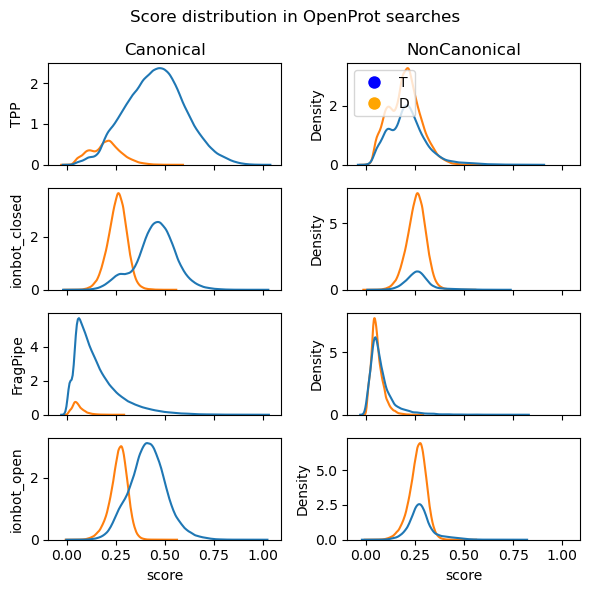

In [243]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

fig,ax=plt.subplots(4,2,sharex=True,figsize=(6,6))
fig.suptitle("Score distribution in OpenProt searches");
custom_lines = [
    Line2D([0], [0], marker='o', color='w', label='T',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='D',
           markerfacecolor='orange', markersize=10)
]

data.pipeline = data.pipeline.astype("category")
data.pipeline = data.pipeline.cat.set_categories(["TPP","ionbot_closed","FragPipe","ionbot_open"])
data.sort_values(["pipeline"],inplace=True)
for i,(pipeline,df1) in enumerate(data[data.searchDB=="openprot"].groupby("pipeline")):
    df1["score"]=NormalizeData(df1["score"])
    decoy_df=df1[df1.database=="D"]
    for j,(isCanonical, df2) in enumerate(df1[df1.database=="T"].groupby("isCanonical")):
        df2=pd.concat([df2,decoy_df])
        sns.kdeplot(data=df2, x="score", hue="database",ax=ax[i,j], common_norm=True,legend=False)
        if i==0: ax[i,j].set_title(isCanonical)
        if j==0: ax[i,j].set_ylabel(pipeline)
        if i==0 and j==1: ax[i,j].legend(handles=custom_lines, loc='upper left')            
plt.tight_layout()

In [227]:
df=data[(data.pipeline=="TPP")&(data.searchDB=="openprot")&(data.isCanonical=="NonCanonical")&(df.database=="T")]
cost_max=df[df.global_q<0.01].custom_q.max()
df3=df[df.custom_q<=cost_max]
df3["glob_q_filt"]=df3.global_q<0.01
print(cost_max,len(df3))

/tmp/ipykernel_164346/2667240493.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=data[(data.pipeline=="TPP")&(data.searchDB=="openprot")&(data.isCanonical=="NonCanonical")&(df.database=="T")]


0.0 15694


/tmp/ipykernel_164346/1430385608.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i,(pipeline,df1) in enumerate(data[data.searchDB=="openprot"].groupby("pipeline")):
/tmp/ipykernel_164346/1430385608.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["glob_q_filt"]=df3.global_q<0.01


TPP Canonical 0.034413463953780456 249728
TPP NonCanonical 0.0 22121
ionbot_closed Canonical 0.031026252983293555 211015


/tmp/ipykernel_164346/1430385608.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["glob_q_filt"]=df3.global_q<0.01
/tmp/ipykernel_164346/1430385608.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["glob_q_filt"]=df3.global_q<0.01
/tmp/ipykernel_164346/1430385608.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

ionbot_closed NonCanonical 0.8461538461538461 4978
FragPipe Canonical 0.1511627906976744 245904
FragPipe NonCanonical 0.0 14229
ionbot_open Canonical 0.0297029702970297 345840


/tmp/ipykernel_164346/1430385608.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["glob_q_filt"]=df3.global_q<0.01
/tmp/ipykernel_164346/1430385608.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["glob_q_filt"]=df3.global_q<0.01


ionbot_open NonCanonical 0.7972027972027972 44801


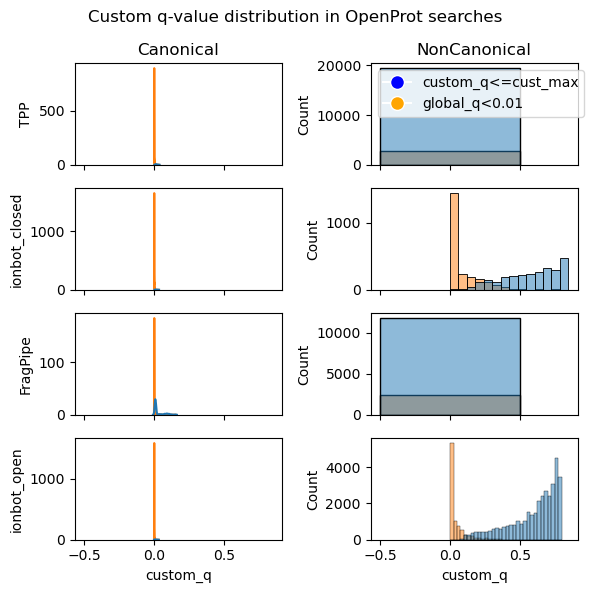

In [247]:
fig,ax=plt.subplots(4,2,sharex=True,figsize=(6,6))
fig.suptitle("Custom q-value distribution in OpenProt searches");
custom_lines = [
    Line2D([0], [0], marker='o', color='w', label='custom_q<=cust_max',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='global_q<0.01',
           markerfacecolor='orange', markersize=10)
]

data.pipeline = data.pipeline.astype("category")
data.pipeline = data.pipeline.cat.set_categories(["TPP","ionbot_closed","FragPipe","ionbot_open"])
data.sort_values(["pipeline"],inplace=True)
for i,(pipeline,df1) in enumerate(data[data.searchDB=="openprot"].groupby("pipeline")):
    for j,(isCanonical, df2) in enumerate(df1[df1.database=="T"].groupby("isCanonical")):
        cost_max=df2[df2.global_q<0.01].custom_q.max()
        df3=df2[df2.custom_q<=cost_max]
        df3["glob_q_filt"]=df3.global_q<0.01
        print(pipeline,isCanonical,cost_max,len(df3))
        if isCanonical=="Canonical": #cost_max!=0:
            sns.kdeplot(data=df3, x="custom_q", hue="glob_q_filt",ax=ax[i,j], common_norm=True,legend=False)
        else:
            sns.histplot(data=df3, x="custom_q", hue="glob_q_filt",ax=ax[i,j], common_norm=True,legend=False)
        if i==0: ax[i,j].set_title(isCanonical)
        if j==0: ax[i,j].set_ylabel(pipeline)
        if i==0 and j==1: ax[i,j].legend(handles=custom_lines, loc='upper left') 
plt.tight_layout()

/tmp/ipykernel_164346/199414502.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for i,(pipeline,df1) in enumerate(data[data.searchDB=="openprot"].groupby("pipeline")):
/tmp/ipykernel_164346/199414502.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["glob_q_filt"]=df3.global_q<0.01
/tmp/ipykernel_164346/199414502.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

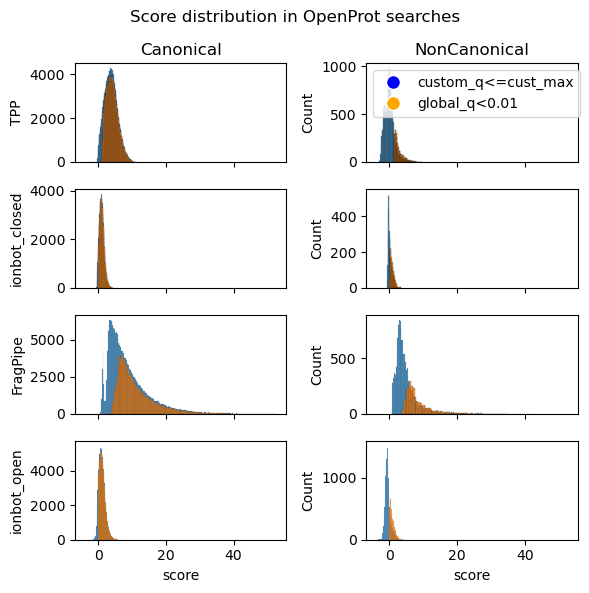

In [246]:
fig,ax=plt.subplots(4,2,sharex=True,figsize=(6,6))
fig.suptitle("Score distribution in OpenProt searches");
custom_lines = [
    Line2D([0], [0], marker='o', color='w', label='custom_q<=cust_max',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='global_q<0.01',
           markerfacecolor='orange', markersize=10)
]

data.pipeline = data.pipeline.astype("category")
data.pipeline = data.pipeline.cat.set_categories(["TPP","ionbot_closed","FragPipe","ionbot_open"])
data.sort_values(["pipeline"],inplace=True)
for i,(pipeline,df1) in enumerate(data[data.searchDB=="openprot"].groupby("pipeline")):
    for j,(isCanonical, df2) in enumerate(df1[df1.database=="T"].groupby("isCanonical")):
        cost_max=df2[df2.global_q<0.01].custom_q.max()
        df3=df2[df2.custom_q<=cost_max]
        df3["glob_q_filt"]=df3.global_q<0.01
        #print(pipeline,isCanonical,cost_max,len(df3))
        #if isCanonical=="Canonical": #cost_max!=0:
        sns.histplot(data=df3, x="score",ax=ax[i,j], common_norm=True,legend=False)
        sns.histplot(data=df3[df3["glob_q_filt"]], x="score",ax=ax[i,j], common_norm=True,legend=False)
        #else:
        #    sns.histplot(data=df3, x="custom_q", hue="glob_q_filt",ax=ax[i,j], common_norm=True,legend=False)
        if i==0: ax[i,j].set_title(isCanonical)
        if j==0: ax[i,j].set_ylabel(pipeline)
        if i==0 and j==1: ax[i,j].legend(handles=custom_lines, loc='upper left') 
plt.tight_layout()

### Select the q-value threshold

#### Get dataset-specific FDR threshold based on ionbot entrapment for non-canonical

In [254]:
from collections import defaultdict

In [309]:
#reference http://localhost:1327/notebooks/plot-0-fdp.ipynb
#load files from Francis
#fdp_op=pd.read_csv("./../all_subsets_stats.csv")

#reference analysis_on_groupwalk/Ionbot_FDP-main/workflow/scripts/plot_openprot_subset_fdp.py
fdp_working_dir="./ionbot_results_fdp/peptide_level/"
STATS_CSV = ""

SEARCH_TYPE = ["ClosedSearch","OpenSearch"]
GROUP_TYPE = ["PTM"]
PXD = ["PXD002057","PXD005833","PXD014258"]
DATABASE=["open"]
APPROACH = ["classic","groupwise"]
FDP_SUF="_fdp.csv"
groups = [["common", "unique_canonical"], ["unique_noncanonical"]]


In [292]:
a,b,c,d,e=0,0,0,0,0
glob.glob(f"{fdp_working_dir}{SEARCH_TYPE[a]}_{GROUP_TYPE[b]}/{PXD[c]}-{DATABASE[d]}/{APPROACH[e]}/{'subsets/' if subsets else '' }*{FDP_SUF}")

['./ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/unique_canonical_130327_o2_06_hu_P3_2hr_fdp.csv',
 './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/unique_canonical_130327_o2_05_hu_C3_2hr_fdp.csv',
 './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/common_130327_o2_03_hu_C2_2hr_fdp.csv',
 './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/unique_noncanonical_130327_o2_01_hu_C1_2hr_fdp.csv',
 './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/unique_noncanonical_130327_o2_02_hu_P1_2hr_fdp.csv',
 './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/unique_noncanonical_130327_o2_03_hu_C2_2hr_fdp.csv',
 './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/unique_canonical_130327_o2_04_hu_P2_2hr_fdp.csv',
 './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PX

In [448]:
run_results = defaultdict(
    lambda: defaultdict(
        lambda: defaultdict(
            lambda: defaultdict(
                lambda: defaultdict(
                    lambda: defaultdict(pd.DataFrame)
                )
            )
        )
    )
)

# Extract data

keys_deapth=[]
for search in SEARCH_TYPE:
    for group in GROUP_TYPE:
        for pxd in PXD:
            for database in DATABASE:
                subsets= database=="open"
                for approach in APPROACH:
                    files=glob.glob(f"{fdp_working_dir}{search}_{group}/{pxd}-{database}/{approach}/{'subsets/' if subsets else '' }*{FDP_SUF}")
                    if subsets:
                        for subset in groups:
                            files_subset=[file for file in files if any(sub in file for sub in subset)]
                            print(search,group,pxd,database,approach,subset)
                            print(files_subset)
                            df=pd.concat([pd.read_csv(file, sep=",") for file in files_subset])
                            df.reset_index(drop=True,inplace=True)
                            df[["q_value", "lower_bound_fdp", "paired_fdp"]] *= 100
                            df = df[df["q_value"] <= 10]
                            run_results[search][group][pxd][database][approach]["+".join(subset)] = df
                            keys_deapth.append([search,group,pxd,database,approach,"+".join(subset)])
keys_deapth=pd.DataFrame(keys_deapth,columns=['search_type', 'group_type','pxd','database','approach','subset'])                            

ClosedSearch PTM PXD002057 open classic ['common', 'unique_canonical']
['./ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/unique_canonical_130327_o2_06_hu_P3_2hr_fdp.csv', './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/unique_canonical_130327_o2_05_hu_C3_2hr_fdp.csv', './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/common_130327_o2_03_hu_C2_2hr_fdp.csv', './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/unique_canonical_130327_o2_04_hu_P2_2hr_fdp.csv', './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/common_130327_o2_02_hu_P1_2hr_fdp.csv', './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/common_130327_o2_01_hu_C1_2hr_fdp.csv', './ionbot_results_fdp/peptide_level/ClosedSearch_PTM/PXD002057-open/classic/subsets/unique_canonical_130327_o2_02_hu_P1_2hr_fdp.csv', './ionbot_results_fd

In [488]:
#reference utils.py

# Size of the rolling window used in average_runs() and get_std_bound()

def average_runs(df,ROLLING_WINDOW = 250):
    """Use a rolling window to average the FDP metrics across all runs of the
    given dataset"""

    # Make sure df is sorted
    df = df.sort_values("q_value").reset_index()

    cols = ["combined_fdp", "lower_bound_fdp", "paired_fdp", "q_value"]
    averaged_df = df[cols].rolling(window=ROLLING_WINDOW).mean()
    #averaged_df["peptide"] = df.peptide
    #@ delet empty rows
    averaged_df=averaged_df.loc[averaged_df.isna().all(axis=1)==False,].reset_index()
    return averaged_df
def get_std_bound(df,ROLLING_WINDOW = 250):
    """Use a rolling window to calculate the standard deviation of the FDP metrics
    across all runs of the given dataset"""

    # Make sure df is sorted
    df = df.sort_values("q_value").reset_index()

    # Get std
    cols = ["combined_fdp", "lower_bound_fdp", "paired_fdp", "q_value"]
    std_df=df[cols].rolling(window=ROLLING_WINDOW).std()
    std_df=std_df.loc[std_df.isna().all(axis=1)==False,].reset_index()
    return std_df

#try    
df=run_results[search][group][pxd][database][approach]['common+unique_canonical']
averaged_df=average_runs(df)
std_df = get_std_bound(df)
stats_df=averaged_df.merge(std_df, on="index", suffixes=("_av","_std"))
#how upper band in all_openprot_stats was calculated (reference utils)
idx = stats_df.index[stats_df["q_value_av"] < 1]
stats_df['paired_fdp_av'][idx[-1]]

np.float64(1.7546681745875226)

##### What is the FDP % for canonical peptides (common+unique canon) with a global FDR of 1% strategy

##### Check the reason for discrepancy with Francis output and decide for best approach

In [457]:
#not avaraged with rolling window

keys_sel=keys_deapth[(keys_deapth.approach=="classic")&(keys_deapth.subset=="common+unique_canonical")]
keys_sel["fdr_1_upper_bound_av"]="NA"
for i,row in keys_sel.iterrows():
    search,group,pxd,database,approach,subset = row.values[:-1]
    df=run_results[search][group][pxd][database][approach][subset]
    val=df[(df.q_value<1)].paired_fdp.mean()
    keys_sel.loc[i,"fdr_1_upper_bound_av"]=val#round(val,1)

/tmp/ipykernel_164346/1778029782.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keys_sel["fdr_1_upper_bound_av"]="NA"


In [458]:
keys_sel

,search_type,group_type,pxd,database,approach,subset,fdr_1_upper_bound_av
0,ClosedSearch,PTM,PXD002057,open,classic,common+unique_canonical,0.070371
4,ClosedSearch,PTM,PXD005833,open,classic,common+unique_canonical,0.142941
8,ClosedSearch,PTM,PXD014258,open,classic,common+unique_canonical,0.140011
12,OpenSearch,PTM,PXD002057,open,classic,common+unique_canonical,0.104753
16,OpenSearch,PTM,PXD005833,open,classic,common+unique_canonical,0.076027
20,OpenSearch,PTM,PXD014258,open,classic,common+unique_canonical,0.163176


In [459]:
#compare with Francis output

fdp_op[(fdp_op.search_modgr=="ClosedSearch_PTM")&(fdp_op.subset.isin(["common", "unique_canonical"]))&(fdp_op.approach=="classic")]

,Unnamed: 0,Total discoveries,Lower bound,Paired method,approach,dataset,subset,search_type,group_type,search_modgr,subset_gen,lower_bound,upper_bound
27,0,7177,0.38%,0.76%,classic,PXD002057,common,ClosedSearch,PTM,ClosedSearch_PTM,common,0.38,0.76
28,1,407,1.64%,3.27%,classic,PXD002057,unique_canonical,ClosedSearch,PTM,ClosedSearch_PTM,unique,1.64,3.27
30,3,30629,0.43%,0.83%,classic,PXD014258,common,ClosedSearch,PTM,ClosedSearch_PTM,common,0.43,0.83
31,4,1711,2.28%,4.53%,classic,PXD014258,unique_canonical,ClosedSearch,PTM,ClosedSearch_PTM,unique,2.28,4.53
33,6,15649,0.37%,0.73%,classic,PXD005833,common,ClosedSearch,PTM,ClosedSearch_PTM,common,0.37,0.73
34,7,844,1.92%,3.84%,classic,PXD005833,unique_canonical,ClosedSearch,PTM,ClosedSearch_PTM,unique,1.92,3.84


In [474]:
#avaraged with rolling window

keys_sel=keys_deapth[(keys_deapth.approach=="classic")&(keys_deapth.subset=="common+unique_canonical")]
keys_sel["fdr_1_upper_bound_av"]="NA"
for i,row in keys_sel.iterrows():
    search,group,pxd,database,approach,subset = row.values[:-1]
    df=run_results[search][group][pxd][database][approach][subset]
    averaged_df=average_runs(df) #sorted
    std_df = get_std_bound(df)
    stats_df=averaged_df.merge(std_df, on="index", suffixes=("_av","_std"))
    idx = stats_df.index[stats_df["q_value_av"] < 1]
    val=stats_df['paired_fdp_av'][idx[-1]]
    keys_sel.loc[i,"fdr_1_upper_bound_av"]=val#round(val,1)

/tmp/ipykernel_164346/4177606609.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keys_sel["fdr_1_upper_bound_av"]="NA"


In [475]:
keys_sel

,search_type,group_type,pxd,database,approach,subset,fdr_1_upper_bound_av
0,ClosedSearch,PTM,PXD002057,open,classic,common+unique_canonical,0.872768
4,ClosedSearch,PTM,PXD005833,open,classic,common+unique_canonical,0.944802
8,ClosedSearch,PTM,PXD014258,open,classic,common+unique_canonical,1.213186
12,OpenSearch,PTM,PXD002057,open,classic,common+unique_canonical,1.264567
16,OpenSearch,PTM,PXD005833,open,classic,common+unique_canonical,0.981407
20,OpenSearch,PTM,PXD014258,open,classic,common+unique_canonical,1.236035


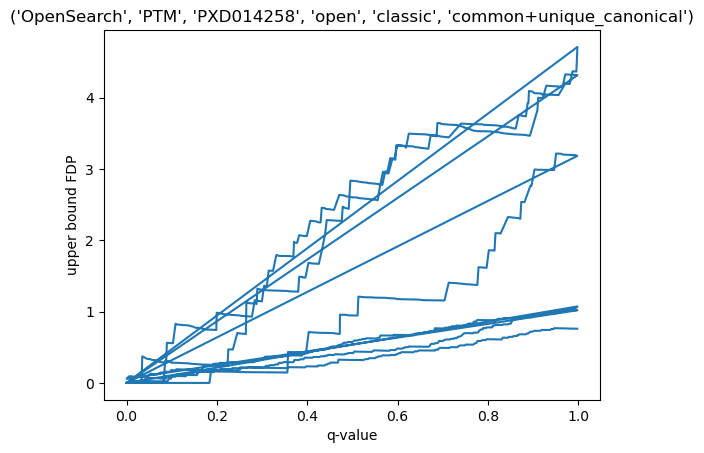

/tmp/ipykernel_164346/1006976723.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values("q_value",inplace=True)


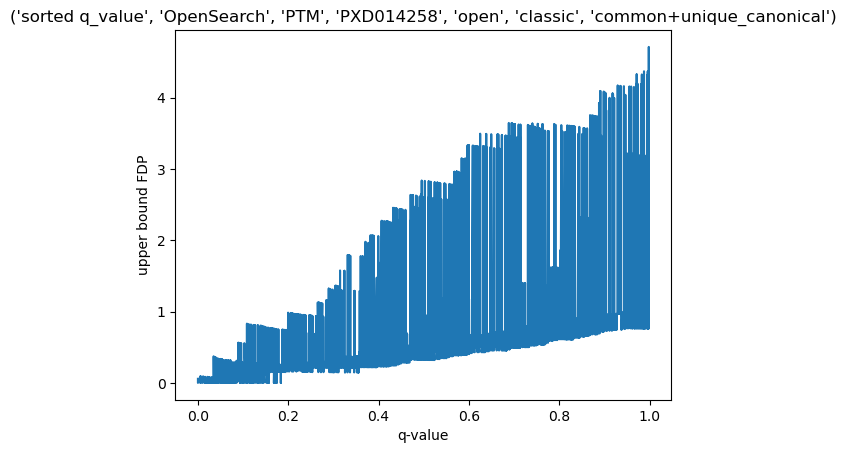

In [476]:
# if there is a big jump in numbers in roling window - it will smooth is by mean but also overestimate the value
#are there big jumps? look at non-smooth data
search,group,pxd,database,approach,subset = row.values[:-1]
df=run_results[search][group][pxd][database][approach][subset]
df=df[df.q_value<1]
plt.plot(df.q_value,df.paired_fdp);
plt.xlabel("q-value");
plt.ylabel("upper bound FDP");
plt.title((search,group,pxd,database,approach,subset)) 
plt.show()
#sort
df.sort_values("q_value",inplace=True)
plt.plot(df.q_value,df.paired_fdp);
plt.xlabel("q-value");
plt.ylabel("upper bound FDP");
plt.title(("sorted q_value",search,group,pxd,database,approach,subset)) 
plt.show()

#though we combined common and canonical, we can still see 2 populations when a dataframe is not sorted by q-value 
#(not nesseseraly by peptide type though, bit we see three apper curves, and three curves that jump from 0 to top which indicates the start of new file)
#as we know, the common paptides are much more aboundant, so when I take avarage, I go closer to common peptides FDP (maybe)
#check the populations - are they devided by peptide type???

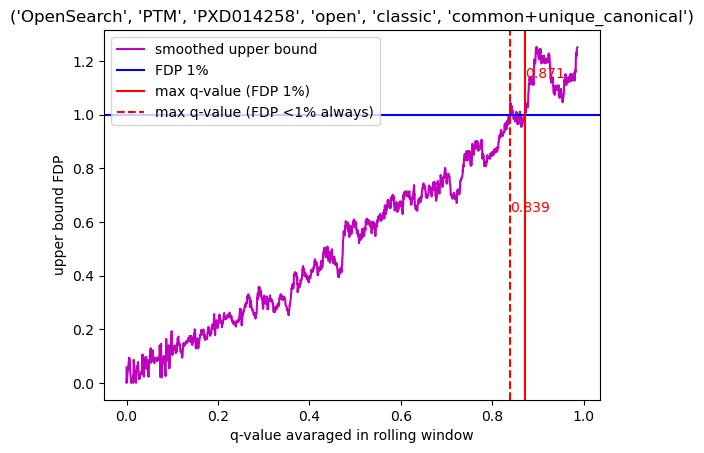

In [477]:
#plot avaraged

def get_q_vertical(stats_df,FDP_THRESH=1):
    """Select highest q-valu, lower which there are no identifications with FDP >=1%"""
    fdp_horizon=100; i=1; q_vertical=np.nan
    while i<len(stats_df) and fdp_horizon>FDP_THRESH:
        fdp_horizon=stats_df.iloc[:-i].paired_fdp_av.max()
        q_vertical=stats_df.iloc[:-i].q_value_av.max()
        i+=1 
    return q_vertical

search,group,pxd,database,approach,subset = row.values[:-1]
df=run_results[search][group][pxd][database][approach][subset]
df=df[df.q_value<1]
averaged_df=average_runs(df) #sorted
std_df = get_std_bound(df)
stats_df=averaged_df.merge(std_df, on="index", suffixes=("_av","_std"))
fdp_1_q_max=stats_df[stats_df.paired_fdp_av<1].q_value_av.max()
q_vertical=get_q_vertical(stats_df)
plt.plot(stats_df.q_value_av,stats_df.paired_fdp_av,color="m",label="smoothed upper bound");
plt.axhline(y=1, color='blue', linestyle='-', label="FDP 1%")
plt.axvline(x=fdp_1_q_max, color='red', linestyle='-',label="max q-value (FDP 1%)")
plt.axvline(x=q_vertical, color='red', linestyle='--',label="max q-value (FDP <1% always)")
# Add text annotations near the vertical lines
y=stats_df.paired_fdp_av.max()/2
plt.text(fdp_1_q_max, y+0.5, f"{fdp_1_q_max:.3f}", color="red", rotation=0, va='bottom', ha='left')
plt.text(q_vertical, y, f"{q_vertical:.3f}", color="red", rotation=0, va='bottom', ha='left')


plt.xlabel("q-value avaraged in rolling window");
plt.ylabel("upper bound FDP");
plt.title((search,group,pxd,database,approach,subset)) 
plt.legend()
plt.show() #takes away lower population


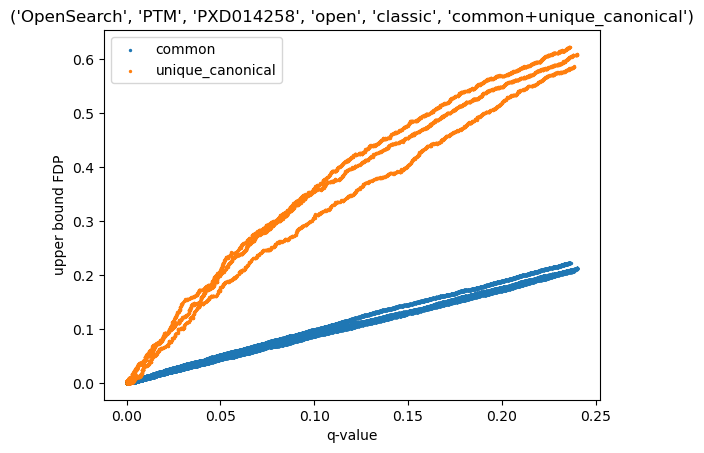

In [478]:
check_files=glob.glob(f"{fdp_working_dir}{search}_{group}/{pxd}-{database}/{approach}/{'subsets/' if subsets else '' }*{FDP_SUF}")
check_files_common=[file for file in check_files if "common" in file]
check_files_canon=[file for file in check_files if "unique_canonical" in file]
#read
df_common=pd.concat([pd.read_csv(file, sep=",") for file in check_files_common])
df_canon=pd.concat([pd.read_csv(file, sep=",") for file in check_files_canon])

#plot non-avarage
df_common=df_common[df_common.q_value<1]
plt.scatter(df_common.q_value,df_common.paired_fdp,label="common",s=2);
df_canon=df_canon[df_canon.q_value<1]
plt.scatter(df_canon.q_value,df_canon.paired_fdp,label="unique_canonical",s=2);
plt.legend()
plt.xlabel("q-value");
plt.ylabel("upper bound FDP");
plt.title((search,group,pxd,database,approach,subset)) 
plt.show()
#BINGO!

In [ ]:
#if we go with just jumming togather the common and canonical peptides FDP, we are taking the avarage of 2 populations, 
#while they behave differently when included in one sorted population

##### **Descision -> go for rolling window on concatinated peptide types (my analysis)**

/tmp/ipykernel_164346/1937294004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keys_sel["fdr_1_upper_bound_rolav"]="NA"
/tmp/ipykernel_164346/1937294004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keys_sel["fdr_1_upper_bound_rolav"]="NA"
/tmp/ipykernel_164346/1937294004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

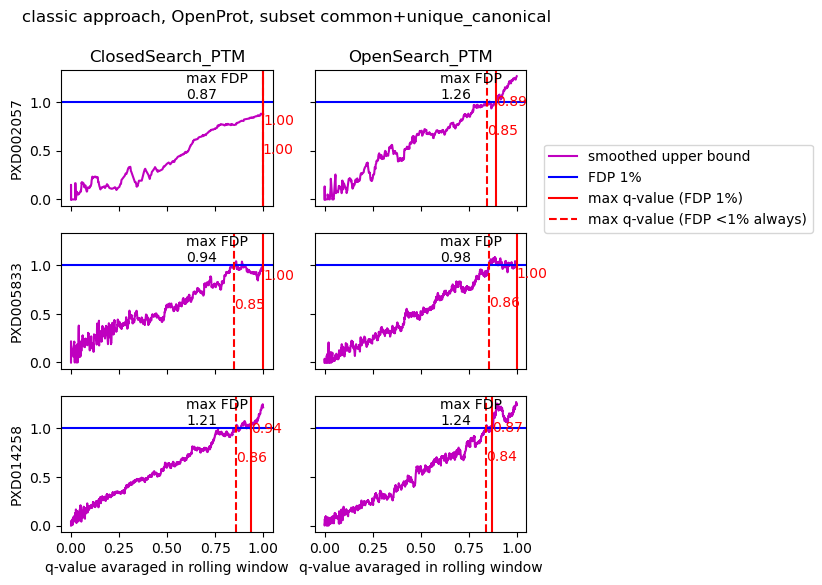

In [467]:
#avaraged with rolling window

keys_sel=keys_deapth[(keys_deapth.approach=="classic")&(keys_deapth.subset=="common+unique_canonical")]
keys_sel["fdr_1_upper_bound_rolav"]="NA"
keys_sel["fdr_1_upper_bound_rolav"]="NA"
keys_sel["fdr_1_upper_bound_rolav"]="NA"

fig, ax= plt.subplots(3,2, sharex=True,sharey=True,figsize=(6,6))
fig.suptitle("classic approach, OpenProt, subset common+unique_canonical")

for i,row in keys_sel.iterrows():
    search,group,pxd,database,approach,subset = row.values[:-1]
    df=run_results[search][group][pxd][database][approach][subset]
    averaged_df=average_runs(df) #sorted
    std_df = get_std_bound(df)
    stats_df=averaged_df.merge(std_df, on="index", suffixes=("_av","_std"))
    # FDR 1%
    stats_df=stats_df[stats_df["q_value_av"] < 1]
    idx = stats_df.index[stats_df["q_value_av"] < 1]
    #maximum upper bound for rolling avarage
    fdr_1_upper_bound_av=stats_df['paired_fdp_av'][idx[-1]]
    # maximum q-value for FDP <1
    fdp_1_q_max=stats_df[stats_df.paired_fdp_av<1].q_value_av.max()
    # max q-value, when FDP is never >=1 in set of peptides ordered by q-value
    q_vertical=get_q_vertical(stats_df)
    #add to table
    keys_sel.loc[i,"fdr_1_upper_bound_rolav"]=fdr_1_upper_bound_av
    keys_sel.loc[i,"fdp_1_q_max_rolav"]=fdp_1_q_max
    keys_sel.loc[i,"fdp_1_always_q_max_rolav"]=q_vertical

    plt_i=PXD.index(pxd)
    plt_y=SEARCH_TYPE.index(search)

    
    ax[plt_i,plt_y].plot(stats_df.q_value_av,stats_df.paired_fdp_av,color="m",label="smoothed upper bound");
    ax[plt_i,plt_y].axhline(y=1, color='blue', linestyle='-', label="FDP 1%")
    ax[plt_i,plt_y].axvline(x=fdp_1_q_max, color='red', linestyle='-',label="max q-value (FDP 1%)")
    ax[plt_i,plt_y].axvline(x=q_vertical, color='red', linestyle='--',label="max q-value (FDP <1% always)")
    # Add text annotations near the vertical lines
    y=stats_df.paired_fdp_av.max()
    ax[plt_i,plt_y].text(0.6, 1, f"max FDP\n{fdr_1_upper_bound_av:.2f}", color="black", rotation=0, va='bottom', ha='left')
    ax[plt_i,plt_y].text(fdp_1_q_max, (y/2)+0.3, f"{fdp_1_q_max:.2f}", color="red", rotation=0, va='bottom', ha='left')
    ax[plt_i,plt_y].text(q_vertical, (y/2), f"{q_vertical:.2f}", color="red", rotation=0, va='bottom', ha='left')
    
    
    if plt_i==2: ax[plt_i,plt_y].set_xlabel("q-value avaraged in rolling window");
    if plt_y==0: ax[plt_i,plt_y].set_ylabel(pxd);
    #ax[plt_i,plt_y].set_ylabel("upper bound FDP");
    if plt_i==0: ax[plt_i,plt_y].set_title("_".join([search,group]))
    #ax[plt_i,plt_y].set_title((search,group,pxd,database,approach,subset)) 
    if  plt_i==0 and plt_y==1: ax[plt_i,plt_y].legend(bbox_to_anchor=(1.05, 0.5))
##plt.tight_layout()

In [468]:
keys_sel.to_csv("ptm_open_classic_common_canon_thresh.csv",index=False)

In [469]:
#So, this is the reference FDP level, which we use to decide on q-value threshold of custom filtering for non-canonical
keys_sel

,search_type,group_type,pxd,database,approach,subset,fdr_1_upper_bound_rolav,fdp_1_q_max_rolav,fdp_1_always_q_max_rolav
0,ClosedSearch,PTM,PXD002057,open,classic,common+unique_canonical,0.872768,0.999965,0.998721
4,ClosedSearch,PTM,PXD005833,open,classic,common+unique_canonical,0.944802,0.999758,0.847846
8,ClosedSearch,PTM,PXD014258,open,classic,common+unique_canonical,1.213186,0.936472,0.859330
12,OpenSearch,PTM,PXD002057,open,classic,common+unique_canonical,1.264567,0.893500,0.846020
16,OpenSearch,PTM,PXD005833,open,classic,common+unique_canonical,0.981407,0.999929,0.855230
20,OpenSearch,PTM,PXD014258,open,classic,common+unique_canonical,1.236035,0.871929,0.840355


/tmp/ipykernel_164346/531173034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keys_sel_nc["fdr_1_upper_bound_rolav"]="NA"
/tmp/ipykernel_164346/531173034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keys_sel_nc["fdr_1_upper_bound_rolav"]="NA"
/tmp/ipykernel_164346/531173034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

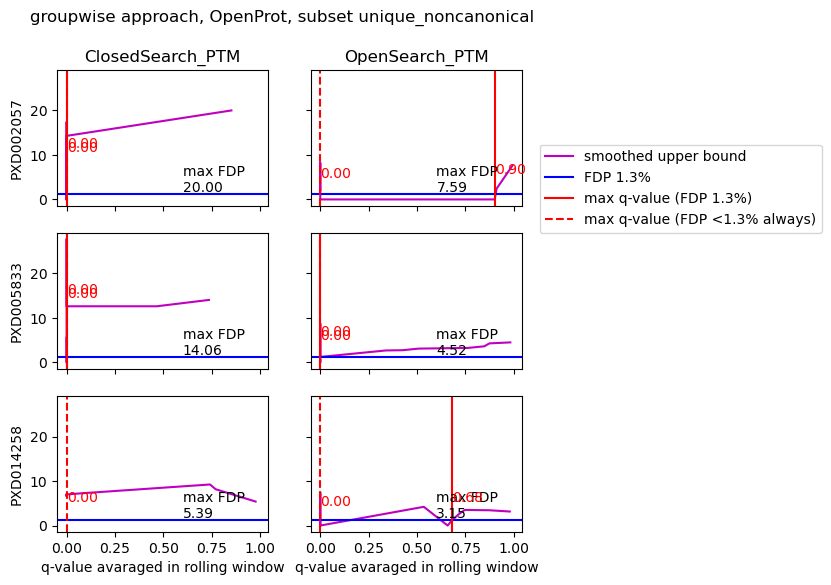

In [491]:
keys_sel_nc=keys_deapth[(keys_deapth.approach=="groupwise")&(keys_deapth.subset=="unique_noncanonical")]
keys_sel_nc["fdr_1_upper_bound_rolav"]="NA"
keys_sel_nc["fdr_1_upper_bound_rolav"]="NA"
keys_sel_nc["fdr_1_upper_bound_rolav"]="NA"

fig, ax= plt.subplots(3,2, sharex=True,sharey=True,figsize=(6,6))
fig.suptitle("groupwise approach, OpenProt, subset unique_noncanonical")

FDP_THRESH=1.3
ROLLING_WINDOW = 10

for i,row in keys_sel_nc.iterrows():
    search,group,pxd,database,approach,subset = row.values[:-1]
    df=run_results[search][group][pxd][database][approach][subset]
    averaged_df=average_runs(df,ROLLING_WINDOW) #sorted
    std_df = get_std_bound(df,ROLLING_WINDOW)
    stats_df=averaged_df.merge(std_df, on="index", suffixes=("_av","_std"))
    # FDR 1%
    stats_df=stats_df[stats_df["q_value_av"] < 1]
    idx = stats_df.index[stats_df["q_value_av"] < 1]
    #maximum upper bound for rolling avarage
    fdr_1_upper_bound_av=stats_df['paired_fdp_av'][idx[-1]]
    # maximum q-value for FDP <1
    fdp_1_q_max=stats_df[stats_df.paired_fdp_av<FDP_THRESH].q_value_av.max()
    # max q-value, when FDP is never >=1 in set of peptides ordered by q-value
    q_vertical=get_q_vertical(stats_df,FDP_THRESH)
    #add to table
    keys_sel_nc.loc[i,"fdr_1_upper_bound_rolav"]=fdr_1_upper_bound_av
    keys_sel_nc.loc[i,"fdp_1_q_max_rolav"]=fdp_1_q_max
    keys_sel_nc.loc[i,"fdp_1_always_q_max_rolav"]=q_vertical

    plt_i=PXD.index(pxd)
    plt_y=SEARCH_TYPE.index(search)

    
    ax[plt_i,plt_y].plot(stats_df.q_value_av,stats_df.paired_fdp_av,color="m",label="smoothed upper bound");
    ax[plt_i,plt_y].axhline(y=FDP_THRESH, color='blue', linestyle='-', label=f"FDP {FDP_THRESH}%")
    ax[plt_i,plt_y].axvline(x=fdp_1_q_max, color='red', linestyle='-',label=f"max q-value (FDP {FDP_THRESH}%)")
    ax[plt_i,plt_y].axvline(x=q_vertical, color='red', linestyle='--',label=f"max q-value (FDP <{FDP_THRESH}% always)")
    # Add text annotations near the vertical lines
    y=stats_df.paired_fdp_av.max()
    ax[plt_i,plt_y].text(0.6, 1, f"max FDP\n{fdr_1_upper_bound_av:.2f}", color="black", rotation=0, va='bottom', ha='left')
    ax[plt_i,plt_y].text(fdp_1_q_max, (y/2)+1, f"{fdp_1_q_max:.2f}", color="red", rotation=0, va='bottom', ha='left')
    ax[plt_i,plt_y].text(q_vertical, (y/2), f"{q_vertical:.2f}", color="red", rotation=0, va='bottom', ha='left')
    
    
    if plt_i==2: ax[plt_i,plt_y].set_xlabel("q-value avaraged in rolling window");
    if plt_y==0: ax[plt_i,plt_y].set_ylabel(pxd);
    #ax[plt_i,plt_y].set_ylabel("upper bound FDP");
    if plt_i==0: ax[plt_i,plt_y].set_title("_".join([search,group]))
    #ax[plt_i,plt_y].set_title((search,group,pxd,database,approach,subset)) 
    if  plt_i==0 and plt_y==1: ax[plt_i,plt_y].legend(bbox_to_anchor=(1.05, 0.5))

In [446]:
keys_sel_nc

,search_type,group_type,pxd,database,approach,subset,fdr_1_upper_bound_rolav,fdp_1_q_max_rolav,fdp_1_always_q_max_rolav
1,ClosedSearch,PTM,PXD002057,open,classic,unique_noncanonical,6.138421,0.435181,0.251652
5,ClosedSearch,PTM,PXD005833,open,classic,unique_noncanonical,8.565793,0.407460,0.000000
9,ClosedSearch,PTM,PXD014258,open,classic,unique_noncanonical,8.445846,0.349863,0.117330
13,OpenSearch,PTM,PXD002057,open,classic,unique_noncanonical,3.906046,0.296245,0.159025
17,OpenSearch,PTM,PXD005833,open,classic,unique_noncanonical,5.443354,0.345304,0.013019
21,OpenSearch,PTM,PXD014258,open,classic,unique_noncanonical,7.004296,0.419802,0.246731


In [447]:
run_results

defaultdict(<function __main__.<lambda>()>,
            {'ClosedSearch': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {'PTM': defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                      {'PXD002057': defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                                   {'open': defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                                                {'classic': defaultdict(pandas.core.frame.DataFrame,
                                                                             {'common+unique_canonical':                        peptide   q_value     score  combined_fdp  n_t  n_p  \
                                                                              0                   GPEVDVSGPK  0.000000  1.9321